In [406]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
from scipy.stats import linregress as lg
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.lines import Line2D
from datetime import datetime, date
from matplotlib.dates import date2num
import numpy as np
import os

In [407]:
#Reading our cleaned data set
if not os.path.exists('output'):
    os.makedirs('output')
df = pd.read_csv("cleaned_data.csv")
test = pd.read_csv("testData.csv")
test


,Country,Total Tests,Daily Tests,date
0,Belgium,82,82,2020-03-01
1,Belgium,399,317,2020-03-02
2,Belgium,937,538,2020-03-03
3,Belgium,1638,701,2020-03-04
4,Belgium,2411,773,2020-03-05
...,...,...,...,...
5034,south-korea,3839436,27033,2020-12-27
5035,south-korea,3868429,28993,2020-12-28
5036,south-korea,3927219,58790,2020-12-29
5037,south-korea,3987751,60532,2020-12-30


In [408]:
#Looking for the unique array of sample continents
df["continent"].unique()

array(['Oceania', 'Europe', 'America', 'Africa', 'Asia'], dtype=object)

In [409]:
#Setting each continent to its own dataframe
europe_df = df[df['continent'] == 'Europe']
africa_df = df[df['continent'] == 'Africa']
asia_df = df[df['continent'] == 'Asia']
america_df = df[df['continent'] == 'America']
oceania_df = df[df['continent'] == 'Oceania']

In [410]:
#Finding value counts for each sample country in Europe
europe_df["Country"].unique()

array(['Belgium', 'Finland', 'France', 'Germany', 'United_Kingdom'],
      dtype=object)

Slope : -64.05610440116
Intercept : 15741.06427464008


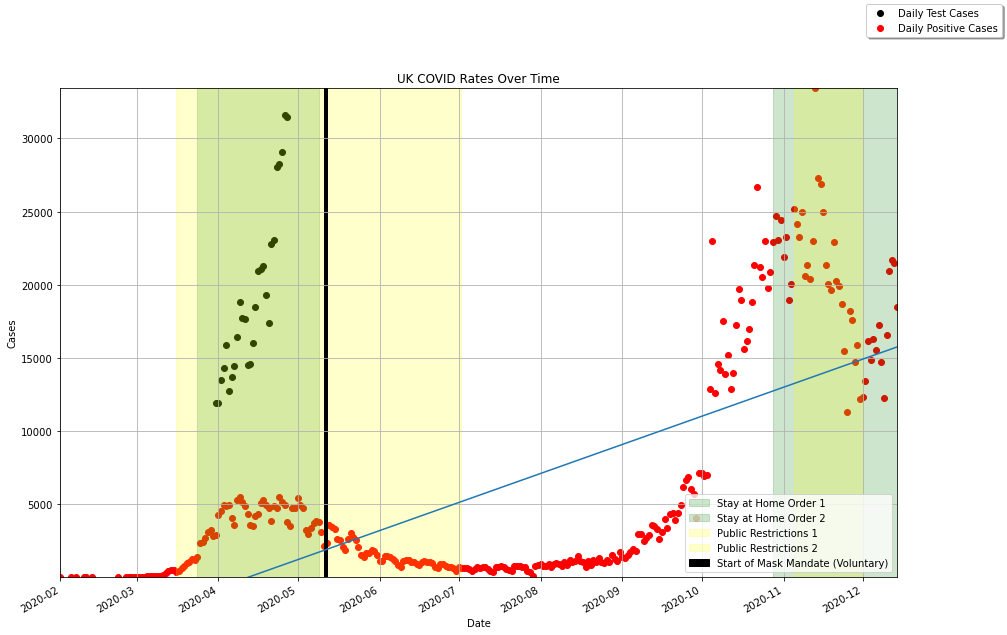

In [357]:
#setting x-axis to date whenever country == United_Kingdom
#set y-axis to cases whenver country == United_kingdom
ukDF = europe_df.loc[europe_df['Country']=='United_Kingdom']
x_axisUK = pd.to_datetime(ukDF['date'])
y_axisUK = ukDF['cases']



#Highlighting areas where mandates were issued in the country
fig, ax = plt.subplots( figsize = (15,10))
ax.axvspan(date2num(datetime(2020,3,24)), date2num(datetime(2020,5,9)),
           label="Stay at Home Order 1",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,10,28)), date2num(datetime(2020,12,14)),
           label="Stay at Home Order 2",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,16)), date2num(datetime(2020,7,2)),
           label="Public Restrictions 1",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,11,5)), date2num(datetime(2020,12,1)),
           label="Public Restrictions 2",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,5,11)), date2num(datetime(2020,5,12)),
           label="Start of Mask Mandate (Voluntary)",color="black", alpha=1)

#secondary plot for testing
tDF = test.loc[test['Country'] == 'united-kingdom']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

#trend
x = np.arange(x_axisUK.size)
fit = np.polyfit(x, y_axisUK, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisUK, fit_function(x))

#Scatter plot and labeling axis labels
l2 = plt.scatter(x_axisUK, y_axisUK, marker="o", color = 'red')
title = plt.title('UK COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'),loc = 'upper right', shadow = True)

# Define the date format
monthsUK = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsUK)

#Determining limits to display graph with grid, legend, and results
ax.set_xlim(min(x_axisUK),max(x_axisUK))
ax.set_ylim(min(y_axisUK),max(y_axisUK))
plt.legend(loc='lower right')
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')



Slope : -21.95089836137296
Intercept : 5264.73905261902


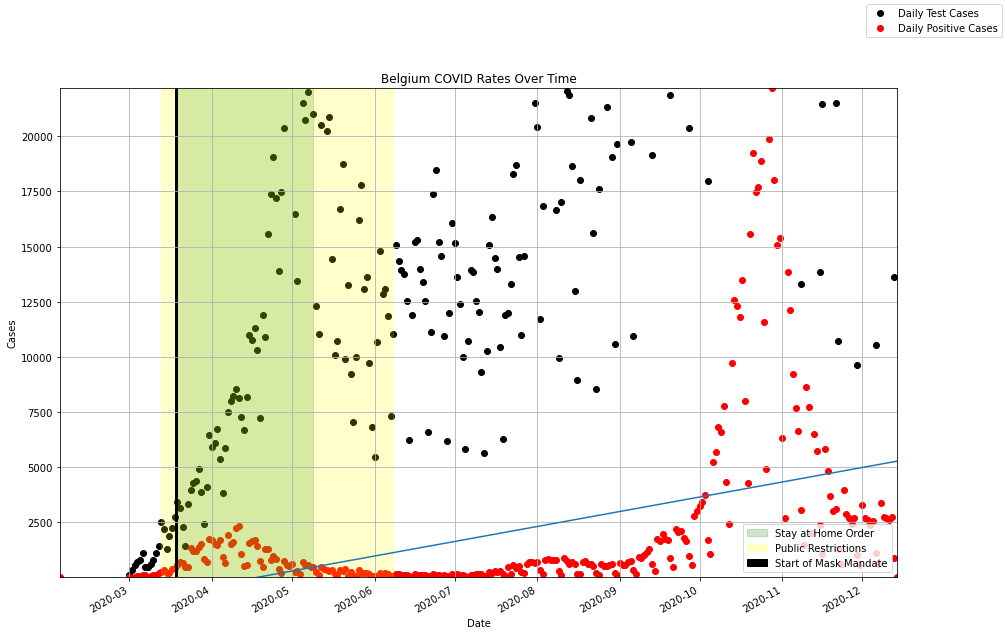

In [356]:
#setting x-axis to date whenever country == Belgium
#set y-axis to cases whenver country == Belgium
beDF = europe_df.loc[europe_df['Country']=='Belgium']
x_axisBE = pd.to_datetime(beDF['date'])
y_axisBE = beDF['cases']

#Highlighting areas where mandates were issued in the country
fig, ax = plt.subplots(figsize= (15,10))
ax.axvspan(date2num(datetime(2020,3,18)), date2num(datetime(2020,5,9)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,13)), date2num(datetime(2020,6,8)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,18)), date2num(datetime(2020,3,19)),
           label="Start of Mask Mandate",color="black", alpha=1)

#secondary plot for testing
tDF = test.loc[test['Country'] == 'Belgium']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

#trend
x = np.arange(x_axisBE.size)
fit = np.polyfit(x, y_axisBE, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisBE, fit_function(x))

#Scatter plat and labeling axis labels
l2 = plt.scatter(x_axisBE, y_axisBE, marker="o", color="red")
title = plt.title('Belgium COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))


# Define the date format
monthsBE = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsBE)

#Determining limits to display graph with grid, legend, and results
ax.set_xlim(min(x_axisBE),max(x_axisBE))
ax.set_ylim(min(y_axisBE),max(y_axisBE))
plt.legend( loc='lower right')
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : -101.04810142669268
Intercept : 22564.847388632857


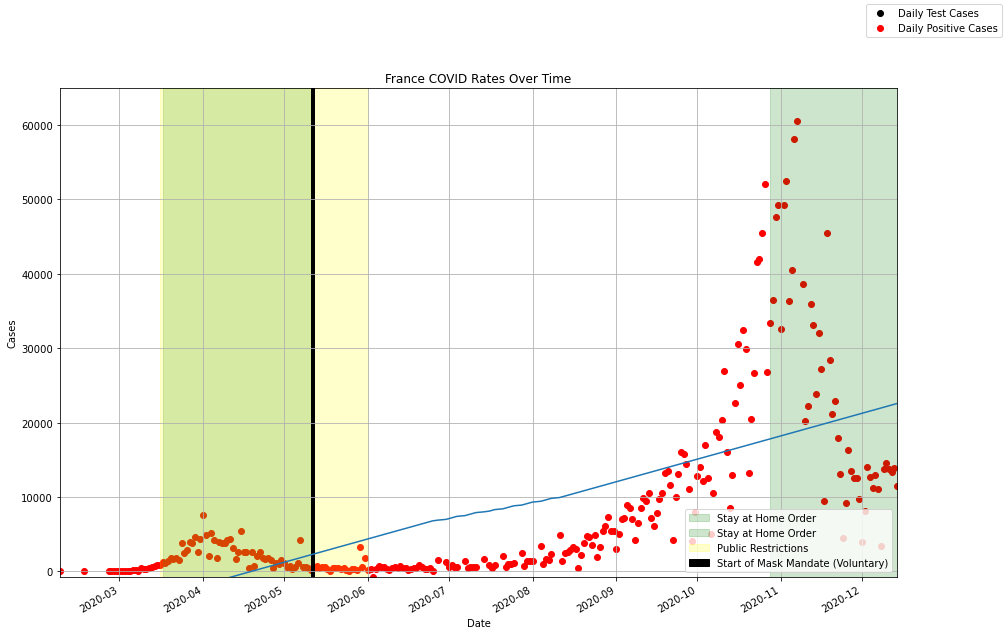

In [367]:
#setting x-axis to date whenever country == France
#set y-axis to cases whenver country == France
frDF = europe_df.loc[europe_df['Country']== 'France']
x_axisFR = pd.to_datetime(frDF['date'])
y_axisFR = frDF['cases']

#Highlighting areas where mandates were issued in the country
fig, ax = plt.subplots(figsize = (15, 10))
ax.axvspan(date2num(datetime(2020,3,17)), date2num(datetime(2020,5,11)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,10,28)), date2num(datetime(2020,12,14)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,16)), date2num(datetime(2020,6,1)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,5,11)), date2num(datetime(2020,5,12)),
           label="Start of Mask Mandate (Voluntary)",color="black", alpha=1)

#secondary plot for testing
tDF = test.loc[test['Country'] == 'france']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

#trend
x = np.arange(x_axisFR.size)
fit = np.polyfit(x, y_axisFR, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisFR, fit_function(x))


#Scatter plot and labeling axis labels
l2 = plt.scatter(x_axisFR, y_axisFR, marker="o", color="red")
title = plt.title('France COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisFR),max(y_axisFR))


# Define the date format
monthsFR = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsFR)

#Determining limits to display graph with grid, legend, and results
ax.set_xlim(min(x_axisFR),max(x_axisFR))
ax.set_ylim(min(y_axisFR), 65000)
plt.legend(loc='lower right')
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : -0.9870643969121449
Intercept : 247.34816616962283


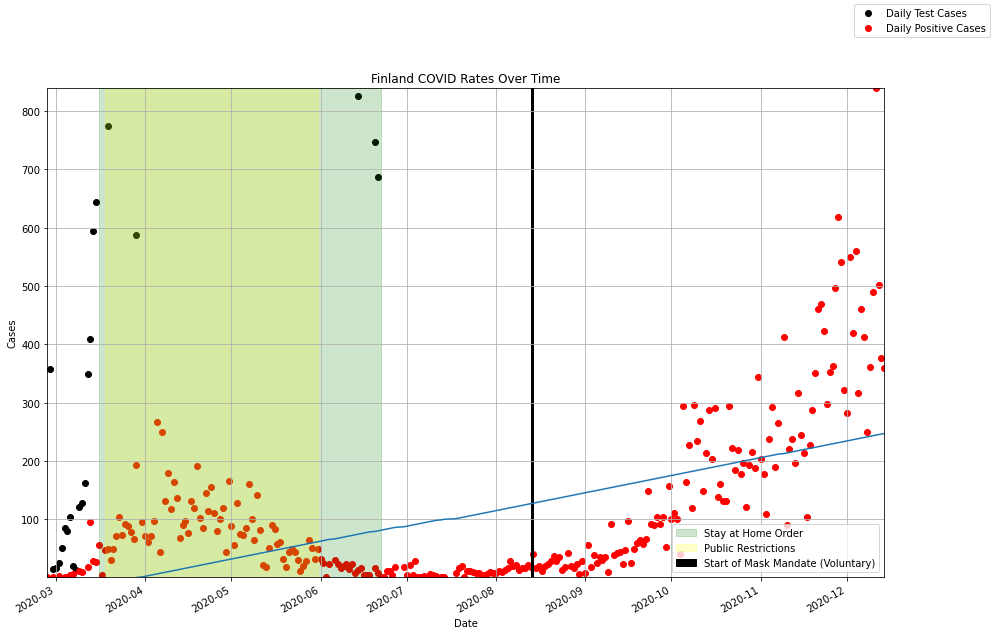

In [368]:
#setting x-axis to date whenever country == Finland
#set y-axis to cases whenver country == Finland
fiDF = europe_df.loc[europe_df['Country']=='Finland']
x_axisFI = pd.to_datetime(fiDF['date'])
y_axisFI = fiDF['cases']

#Highlighting areas where mandates were issued in the country
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,3,16)), date2num(datetime(2020,6,22)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,18)), date2num(datetime(2020,5,31)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,8,13)), date2num(datetime(2020,8,14)),
           label="Start of Mask Mandate (Voluntary)",color="black", alpha=1)

#secondary plot for testing
tDF = test.loc[test['Country'] == 'Finland']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

#trend
x = np.arange(x_axisFI.size)
fit = np.polyfit(x, y_axisFI, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisFI, fit_function(x))

#Scatter plot and labeling axis labels
l2 = plt.scatter(x_axisFI, y_axisFI, marker="o", color="red")
title = plt.title('Finland COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisFI),max(y_axisFI))

# Define the date format
monthsFI = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsFI)

#Determining limits to display graph with grid, legend, and results
ax.set_xlim(min(x_axisFI),max(x_axisFI))
plt.legend(loc = 'lower right')
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : -50.20694341048233
Intercept : 11962.848039867105


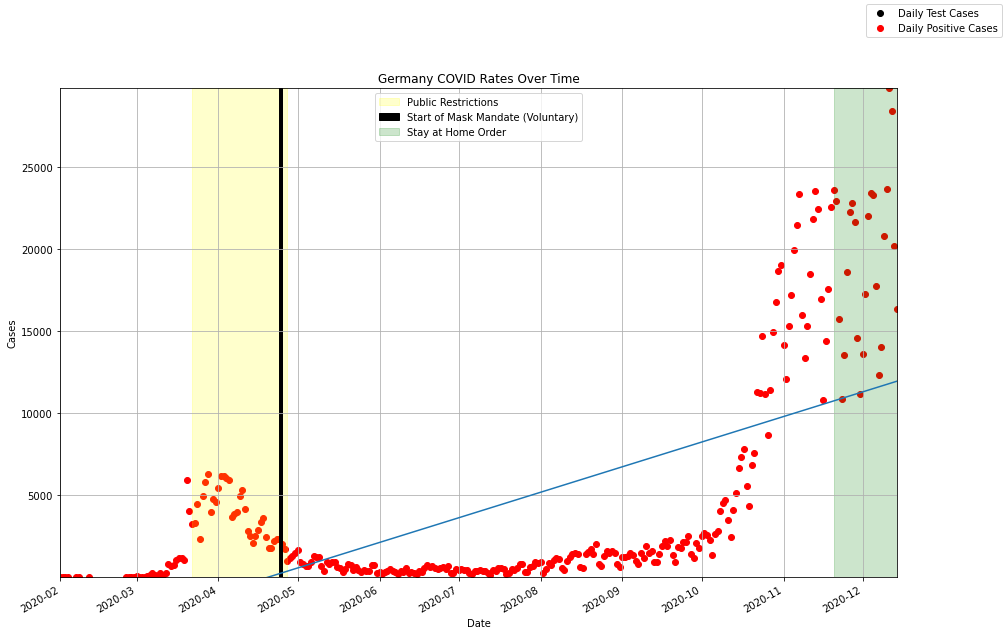

In [369]:
#setting x-axis to date whenever country == Germany
#set y-axis to cases whenver country == Germany
deDF = europe_df.loc[europe_df['Country']=='Germany']
x_axisDE = pd.to_datetime(deDF['date'])
y_axisDE = deDF['cases']

#Highlighting areas where mandates were issued in the country
fig, ax = plt.subplots(figsize=(15,10))
ax.axvspan(date2num(datetime(2020,3,22)), date2num(datetime(2020,4,27)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,24)), date2num(datetime(2020,4,25)),
           label="Start of Mask Mandate (Voluntary)",color="black", alpha=1)
ax.axvspan(date2num(datetime(2020,11,20)), date2num(datetime(2020,12,20)),
           label="Stay at Home Order",color="green", alpha=0.2)

#secondary plot for testing
tDF = test.loc[test['Country'] == 'Germany']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

#trend
x = np.arange(x_axisDE.size)
fit = np.polyfit(x, y_axisDE, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisDE, fit_function(x))

#Scatter plot and labeling axis labels
l2 = plt.scatter(x_axisDE, y_axisDE, marker="o", color="red")
title = plt.title('Germany COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisDE),max(y_axisDE))


# Define the date format
monthsDE = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsDE)

#Determining limits to display graph with grid, legend, and results
ax.set_xlim(min(x_axisDE),max(x_axisDE))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

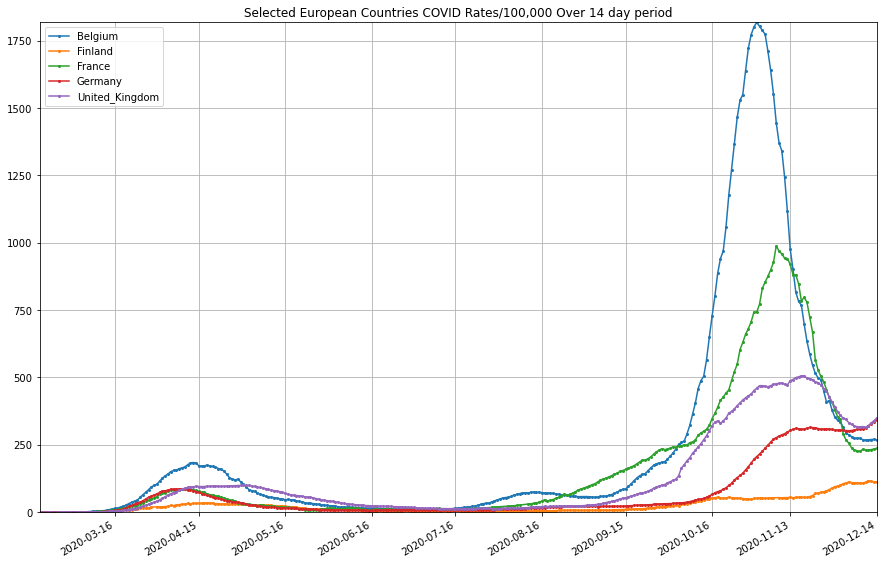

In [235]:
#Defining x and y axis
x_axis = europe_df['date']
y_axis = europe_df['14 day cases/100,000']

#Using a for loop to plot each country in Europe to the same graph
fig, ax = plt.subplots(figsize=(15, 10))
for name in europe_df['Country'].unique():
    plt.plot(europe_df[europe_df['Country'] == name]['date'], europe_df[europe_df['Country'] == name]['14 day cases/100,000'], marker="o",markersize=2, linestyle="solid", label=name)

#Setting months to the x axis
months = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(months)

#Labeling min and max for x axis as dates. Limiting y axis cases at 62000 because outliers
ax.set_xlim(min(x_axis),max(x_axis))
ax.set_ylim(min(y_axis), max(y_axis))
fig.autofmt_xdate()

#Plotting grid and displaying
title = plt.title('Selected European Countries COVID Rates/100,000 Over 14 day period')
plt.grid(True)
ax.legend(loc = 'upper left')
fig.savefig(f'output/Europeanover14days.jpg')

In [119]:
#Finding countries in Africa
africa_df["Country"].unique()

array(['Egypt', 'Ghana', 'Nigeria', 'South_Africa'], dtype=object)

Slope : 0.7965308666075172
Intercept : 327.00061885975106


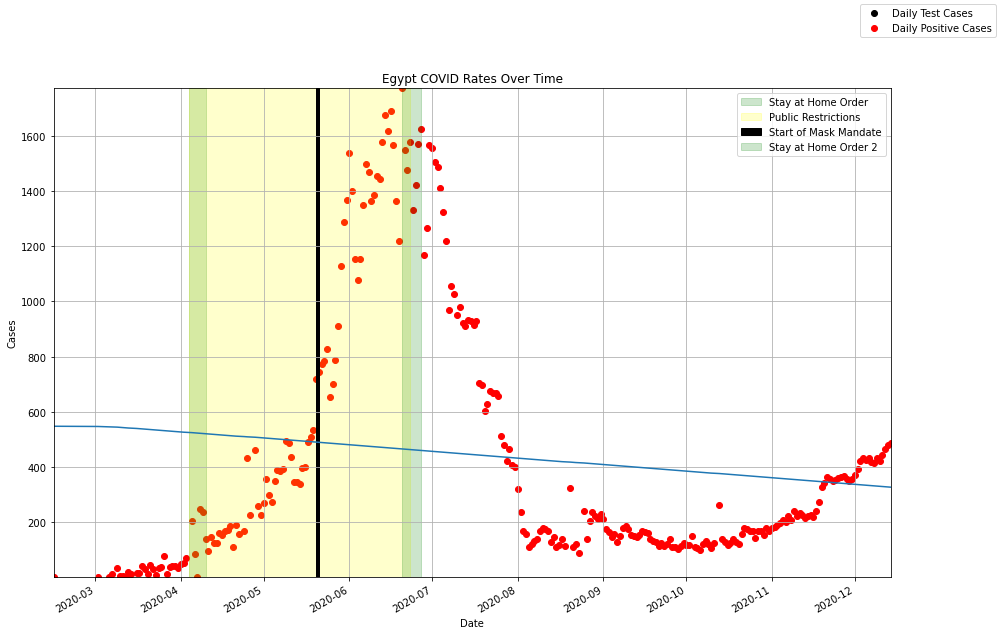

In [373]:
#setting x-axis to date whenever country == Egypt
#set y-axis to cases whenver country == Egypt
egDF = africa_df.loc[africa_df['Country']=='Egypt']
x_axisEG = pd.to_datetime(egDF['date'])
y_axisEG = egDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15,10))
ax.axvspan(date2num(datetime(2020,4,4)), date2num(datetime(2020,4,10)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,4)), date2num(datetime(2020,6,23)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,5,20)), date2num(datetime(2020,5,21)),
           label="Start of Mask Mandate",color="black", alpha=1)
ax.axvspan(date2num(datetime(2020,6,20)), date2num(datetime(2020,6,27)),
           label="Stay at Home Order 2",color="green", alpha=0.2)

#secondary plot for testing
tDF = test.loc[test['Country'] == 'Egypt']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

#trend
x = np.arange(x_axisEG.size)
fit = np.polyfit(x, y_axisEG, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisEG, fit_function(x))

l2 = plt.scatter(x_axisEG, y_axisEG, marker="o", color="red")
title = plt.title('Egypt COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisEG),max(y_axisEG))

# Define the date format
monthsEG = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsEG)

#Setting limits on axis values, setting legend, setting grid, and displaying
ax.set_xlim(min(x_axisEG),max(x_axisEG))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : 0.7929518680457363
Intercept : 207.48665991219175


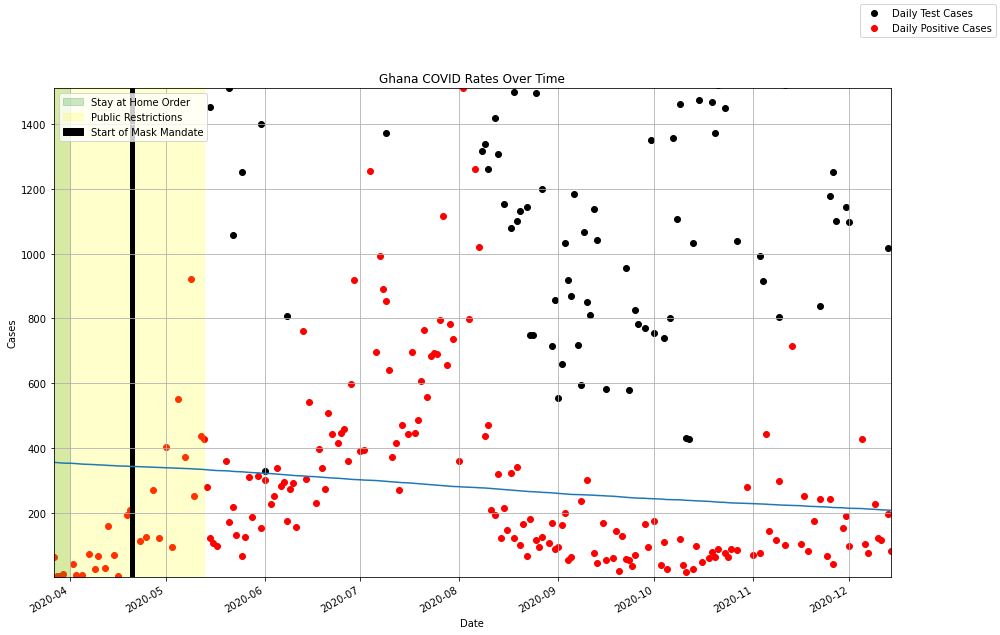

In [375]:
ghDF = africa_df.loc[africa_df['Country']=='Ghana']
x_axisGH = pd.to_datetime(ghDF['date'])
y_axisGH = ghDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15,10))
ax.axvspan(date2num(datetime(2020,3,15)), date2num(datetime(2020,4,1)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,15)), date2num(datetime(2020,5,13)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,20)), date2num(datetime(2020,4,21)),
           label="Start of Mask Mandate",color="black", alpha=1)



#secondary plot for testing
tDF = test.loc[test['Country'] == 'Ghana']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

#trend
x = np.arange(x_axisGH.size)
fit = np.polyfit(x, y_axisGH, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisGH, fit_function(x))

l2 = plt.scatter(x_axisGH, y_axisGH, marker="o", color="red")
title = plt.title('Ghana COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisGH),max(y_axisGH))


# Define the date format
monthsGH = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsGH)

#Setting limits on axis values, setting legend, setting grid, and displaying
ax.set_xlim(min(x_axisGH),max(x_axisGH))
plt.legend(loc='upper left')
fig.autofmt_xdate()
plt.grid(True)
plt.show()


fig.savefig(f'output/{title}.jpg')

Slope : -0.11775957908277962
Intercept : 286.85718190515234


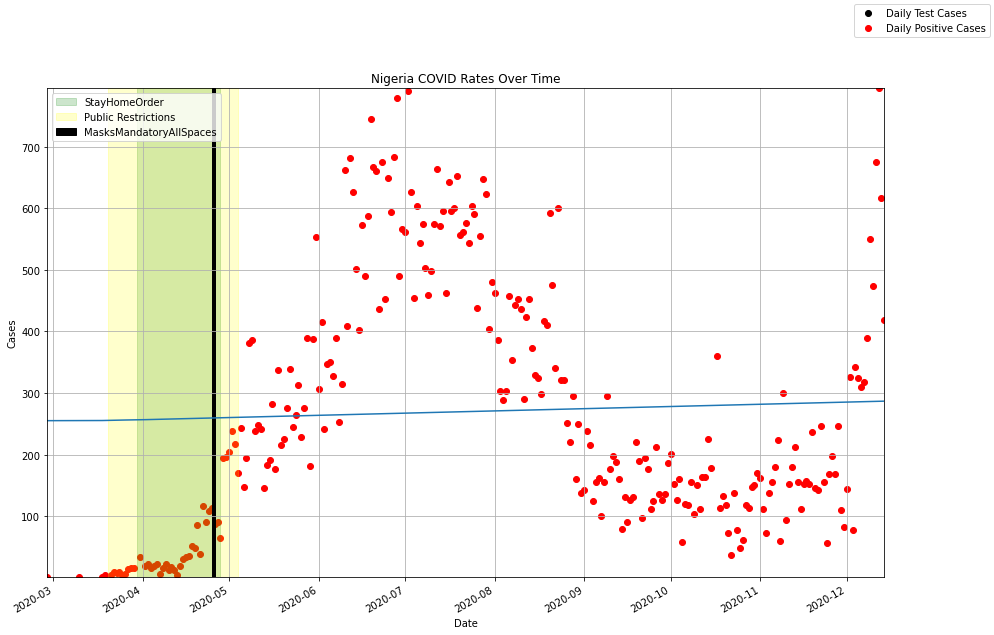

In [376]:
niDF = africa_df.loc[africa_df['Country']=='Nigeria']
x_axisNI = pd.to_datetime(niDF['date'])
y_axisNI = niDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15,10))
ax.axvspan(date2num(datetime(2020,3,30)), date2num(datetime(2020,4,28)),
           label="StayHomeOrder",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,20)), date2num(datetime(2020,5,4)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,25)), date2num(datetime(2020,4,26)),
           label="MasksMandatoryAllSpaces",color="black", alpha=1)

#secondary plot for testing
tDF = test.loc[test['Country'] == 'united-kingdom']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

#trend
x = np.arange(x_axisNI.size)
fit = np.polyfit(x, y_axisNI, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisNI, fit_function(x))

l2 = plt.scatter(x_axisNI, y_axisNI, marker="o", color="red")
title = plt.title('Nigeria COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisNI),max(y_axisNI))



# Define the date format
monthsNI = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsNI)

#Setting limits on axis values, setting legend, setting grid, and displaying
ax.set_xlim(min(x_axisNI),max(x_axisNI))
plt.legend(loc = 'upper left')
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : -6.780089984894463
Intercept : 4117.1345502968425


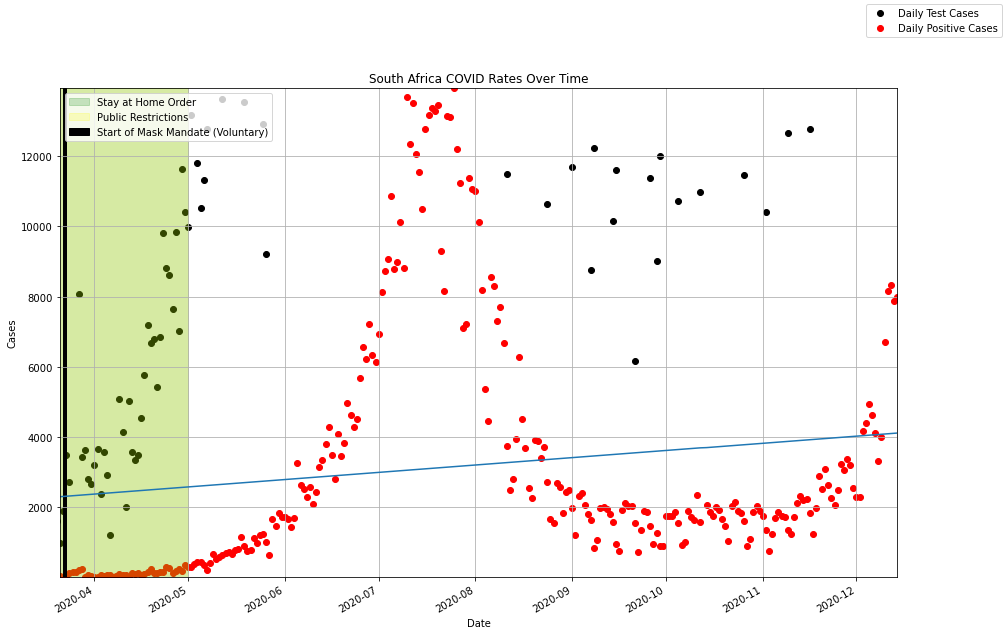

In [378]:
saDF = africa_df.loc[africa_df['Country']=='South_Africa']
x_axisSA = pd.to_datetime(saDF['date'])
y_axisSA = saDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,3,15)), date2num(datetime(2020,5,1)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,15)), date2num(datetime(2020,5,1)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,22)), date2num(datetime(2020,3,23)),
           label="Start of Mask Mandate (Voluntary)",color="black", alpha=1)
l2 = plt.scatter(x_axisSA, y_axisSA, marker="o", color="red")
title = plt.title('South Africa COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

#secondary plot for testing
tDF = test.loc[test['Country'] == 'south-africa']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisSA),max(y_axisSA))


#trend
x = np.arange(x_axisSA.size)
fit = np.polyfit(x, y_axisSA, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisSA, fit_function(x))

# Define the date format
monthsSA = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsSA)

#Setting limits on axis values, setting legend, setting grid, and displaying
ax.set_xlim(min(x_axisSA),max(x_axisSA))
plt.legend(loc='upper left')
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

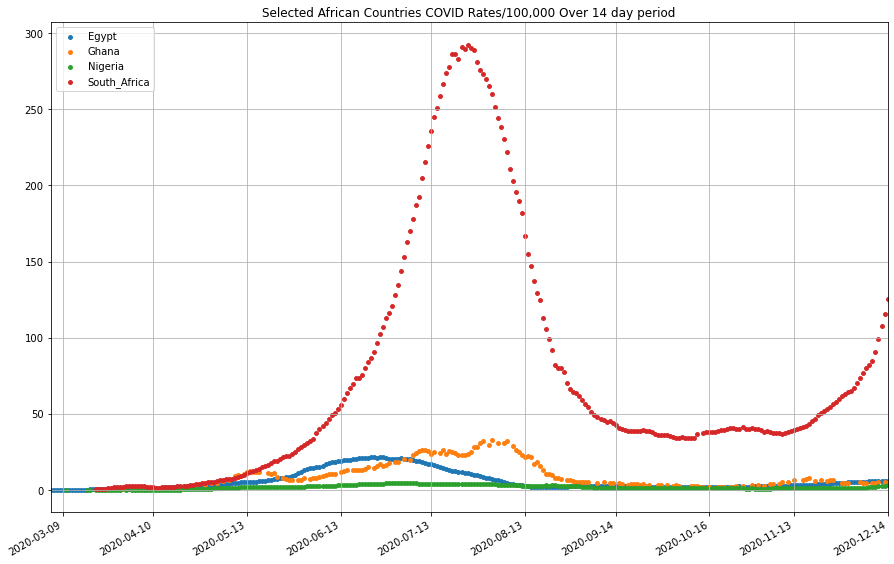

In [441]:
x_axis = africa_df['date']
y_axis = africa_df['14 day cases/100,000']
fig, ax = plt.subplots(figsize=(15, 10))
for name in africa_df['Country'].unique():
    plt.scatter(africa_df[africa_df['Country'] == name]['date'], africa_df[africa_df['Country'] == name]['14 day cases/100,000'],s = 15, label = name)
    
months = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(months)
ax.set_xlim(min(x_axis),max(x_axis))
fig.autofmt_xdate()

#Plotting grid and displaying
title = plt.title('Selected African Countries COVID Rates/100,000 Over 14 day period')
plt.grid(True)
ax.legend(loc = 'upper left')
fig.savefig(f'output/African14day.jpg')

In [430]:
asia_df['Country'].unique()
africa_df[africa_df['Country'] == 'Ghana']

,cases,deaths,Country,population,continent,"14 day cases/100,000",date
2842,81,0,Ghana,30417858.0,Africa,4.750499,2020-12-14
2843,195,1,Ghana,30417858.0,Africa,5.108841,2020-12-13
2844,116,0,Ghana,30417858.0,Africa,4.974052,2020-12-11
2845,122,0,Ghana,30417858.0,Africa,4.592697,2020-12-10
2846,226,1,Ghana,30417858.0,Africa,4.326406,2020-12-09
...,...,...,...,...,...,...,...
3025,43,0,Ghana,30417858.0,Africa,0.618058,2020-04-02
3026,11,0,Ghana,30417858.0,Africa,0.493131,2020-03-30
3027,4,2,Ghana,30417858.0,Africa,0.456968,2020-03-29
3028,5,0,Ghana,30417858.0,Africa,0.443818,2020-03-28


Slope : -14.586091913459535
Intercept : 4087.0551336992216


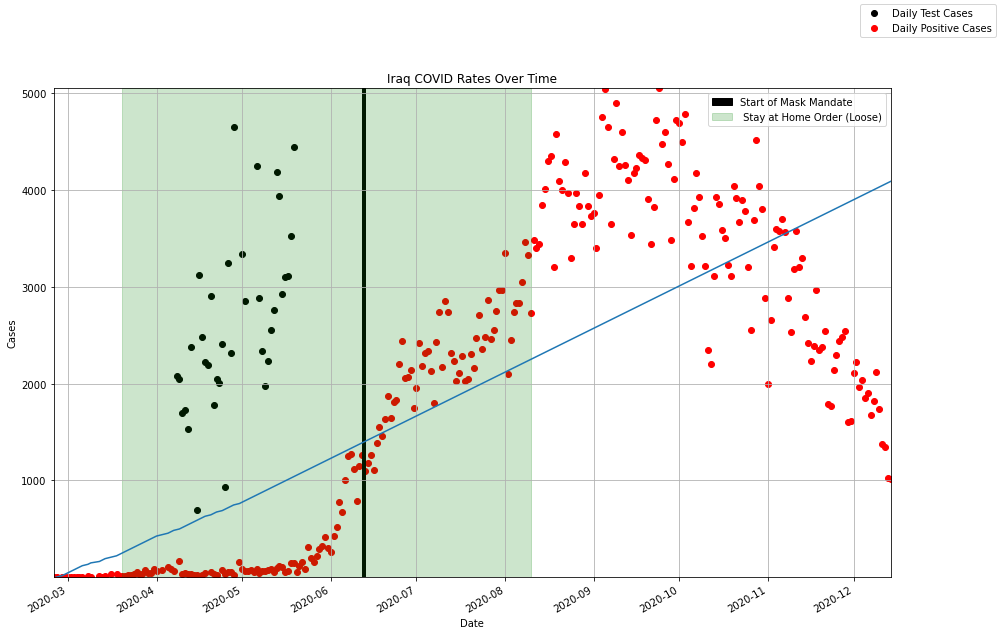

In [380]:
irDF = asia_df.loc[asia_df['Country']=='Iraq']
x_axisIR = pd.to_datetime(irDF['date'])
y_axisIR = irDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,6,12)), date2num(datetime(2020,6,13)),
           label="Start of Mask Mandate",color="black", alpha=1)
ax.axvspan(date2num(datetime(2020,3,20)), date2num(datetime(2020,8,10)),
           label=" Stay at Home Order (Loose)",color="green", alpha=0.2)
l2 = plt.scatter(x_axisIR, y_axisIR, marker="o", color="red")
title = plt.title('Iraq COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

#secondary plot for testing
tDF = test.loc[test['Country'] == 'Iraq']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisIR),max(y_axisIR))



#trend
x = np.arange(x_axisIR.size)
fit = np.polyfit(x, y_axisIR, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisIR, fit_function(x))

# Define the date format
monthsIR = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsIR)

ax.set_xlim(min(x_axisIR),max(x_axisIR))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : -8.657885813373614
Intercept : 2484.973141695702


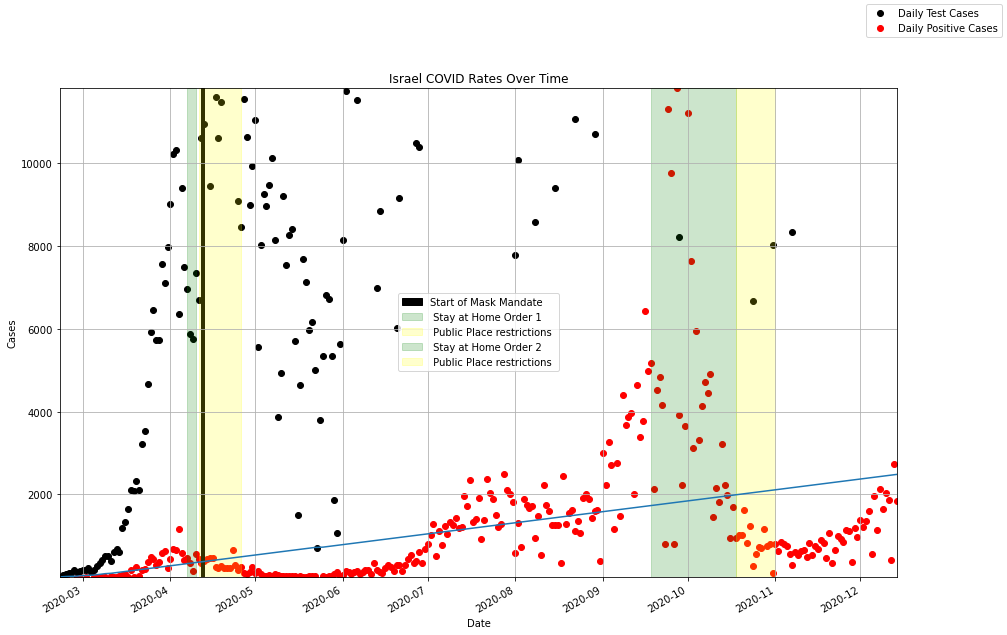

In [382]:
ilDF = asia_df.loc[asia_df['Country']=='Israel']
x_axisIL = pd.to_datetime(ilDF['date'])
y_axisIL = ilDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,4,12)), date2num(datetime(2020,4,13)),
           label="Start of Mask Mandate",color="black", alpha=1)
ax.axvspan(date2num(datetime(2020,4,7)), date2num(datetime(2020,4,10)),
           label=" Stay at Home Order 1",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,11)), date2num(datetime(2020,4,26)),
           label=" Public Place restrictions ",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,9,18)), date2num(datetime(2020,10,18)),
           label=" Stay at Home Order 2",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,10,18)), date2num(datetime(2020,11,1)),
           label=" Public Place restrictions ",color="yellow", alpha=0.2)
l2 = plt.scatter(x_axisIL, y_axisIL, marker="o", color="red")
title = plt.title('Israel COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')


#secondary plot for testing
tDF = test.loc[test['Country'] == 'Israel']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisIL),max(y_axisIL))



#trend
x = np.arange(x_axisIL.size)
fit = np.polyfit(x, y_axisIL, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisIL, fit_function(x))

# Define the date format
monthsIL = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsIL)

ax.set_xlim(min(x_axisIL),max(x_axisIL))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : -3.729887894008532
Intercept : 828.5445789892002


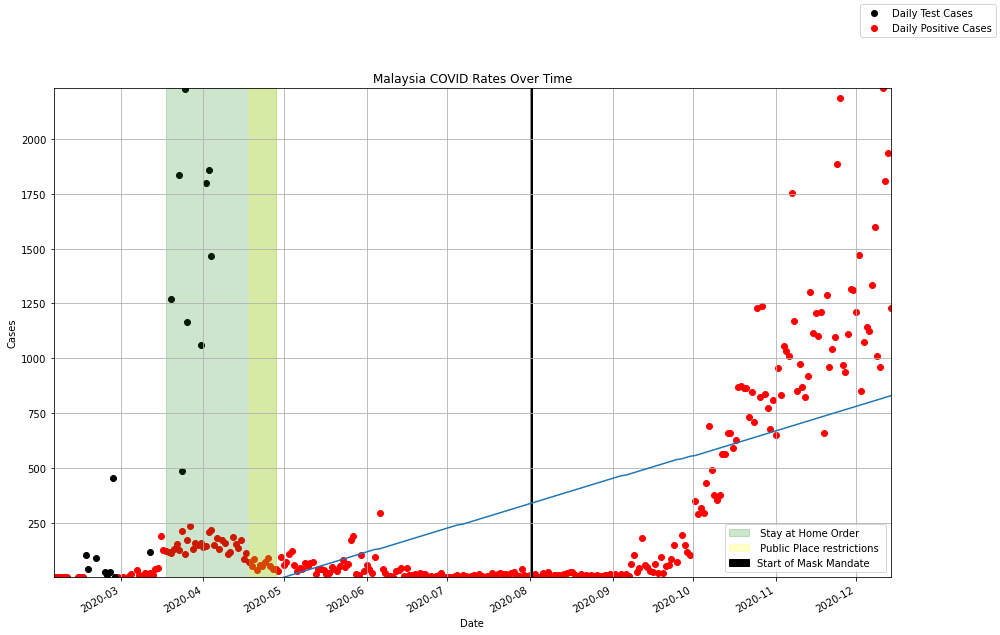

In [384]:
myDF = asia_df.loc[asia_df['Country']=='Malaysia']
x_axisMY = pd.to_datetime(myDF['date'])
y_axisMY = myDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,3,18)), date2num(datetime(2020,4,28)),
           label=" Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,18)), date2num(datetime(2020,4,28)),
           label=" Public Place restrictions ",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,8,1)), date2num(datetime(2020,8,2)),
           label="Start of Mask Mandate",color="black", alpha=1)

l2 = plt.scatter(x_axisMY, y_axisMY, marker="o", color="red")
title = plt.title('Malaysia COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')


#secondary plot for testing
tDF = test.loc[test['Country'] == 'Malaysia']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisMY),max(y_axisMY))



#trend
x = np.arange(x_axisMY.size)
fit = np.polyfit(x, y_axisMY, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisMY, fit_function(x))

# Define the date format
monthsMY = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsMY)

ax.set_xlim(min(x_axisMY),max(x_axisMY))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : 0.8913257799668283
Intercept : 50.37726376931852


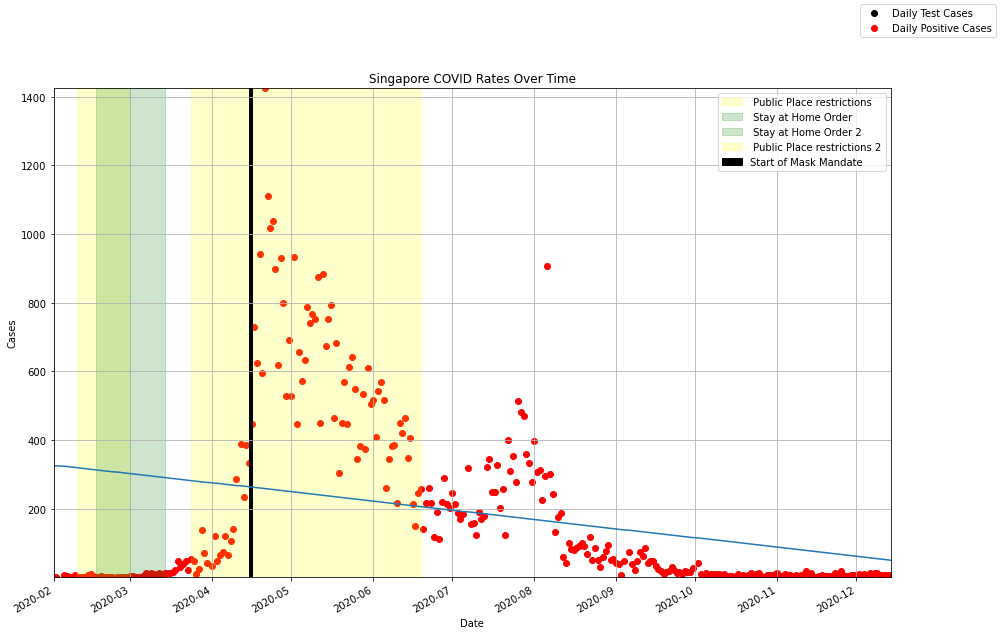

In [386]:
sgDF = asia_df.loc[asia_df['Country']=='Singapore']
x_axisSG = pd.to_datetime(sgDF['date'])
y_axisSG = sgDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,2,10)), date2num(datetime(2020,3,1)),
           label=" Public Place restrictions ",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,2,17)), date2num(datetime(2020,3,1)),
           label=" Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,1)), date2num(datetime(2020,3,14)),
           label=" Stay at Home Order 2",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,24)), date2num(datetime(2020,6,19)),
           label=" Public Place restrictions 2",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,15)), date2num(datetime(2020,4,16)),
           label="Start of Mask Mandate",color="black", alpha=1)

plt.scatter(x_axisSG, y_axisSG, marker="o", color="red")
title = plt.title('Singapore COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

#secondary plot for testing
tDF = test.loc[test['Country'] == 'Singapore']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisSG),max(y_axisSG))

#trend
x = np.arange(x_axisSG.size)
fit = np.polyfit(x, y_axisSG, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisSG, fit_function(x))

# Define the date format
monthsSG = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsSG)

ax.set_xlim(min(x_axisSG),max(x_axisSG))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : -0.7129219947711013
Intercept : 250.80230354899817


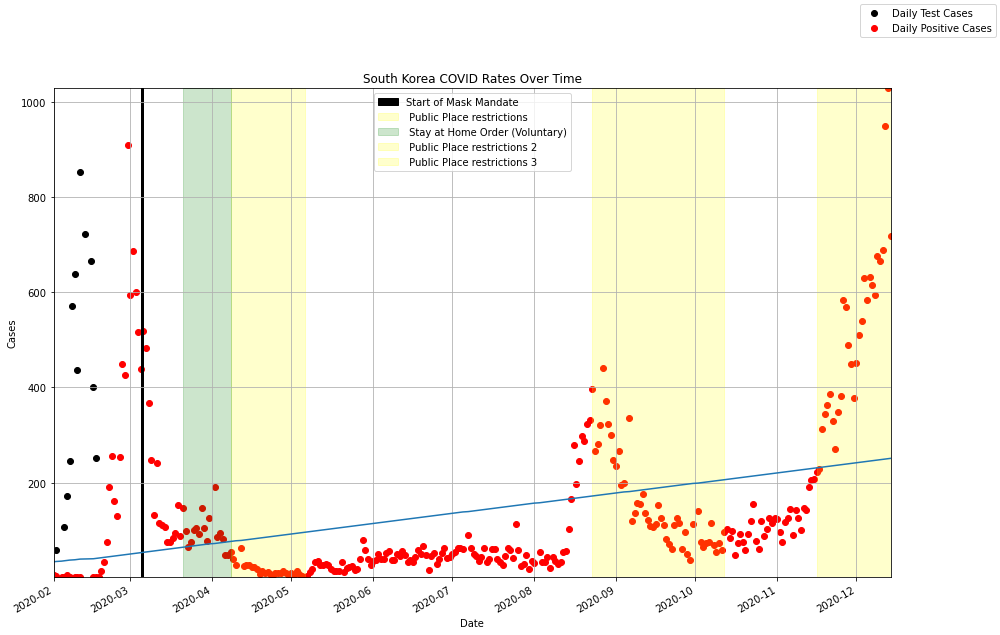

In [388]:
skDF = asia_df.loc[asia_df['Country']=='South_Korea']
x_axisSK = pd.to_datetime(skDF['date'])
y_axisSK = skDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,3,5)), date2num(datetime(2020,3,6)),
           label="Start of Mask Mandate",color="black", alpha=1)
ax.axvspan(date2num(datetime(2020,4,8)), date2num(datetime(2020,5,6)),
           label=" Public Place restrictions ",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,21)), date2num(datetime(2020,4,8)),
           label=" Stay at Home Order (Voluntary)",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,8,23)), date2num(datetime(2020,10,12)),
           label=" Public Place restrictions 2",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,11,16)), date2num(datetime(2020,12,31)),
           label=" Public Place restrictions 3",color="yellow", alpha=0.2)
l2 = plt.scatter(x_axisSK, y_axisSK, marker="o", color="red")
title = plt.title('South Korea COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

#secondary plot for testing
tDF = test.loc[test['Country'] == 'south-korea']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisSK),max(y_axisSK))



#trend
x = np.arange(x_axisSK.size)
fit = np.polyfit(x, y_axisSK, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisSK, fit_function(x))

# Define the date format
monthsSK = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsSK)

ax.set_xlim(min(x_axisSK),max(x_axisSK))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : 0.006041281213505001
Intercept : 6.755414714797462


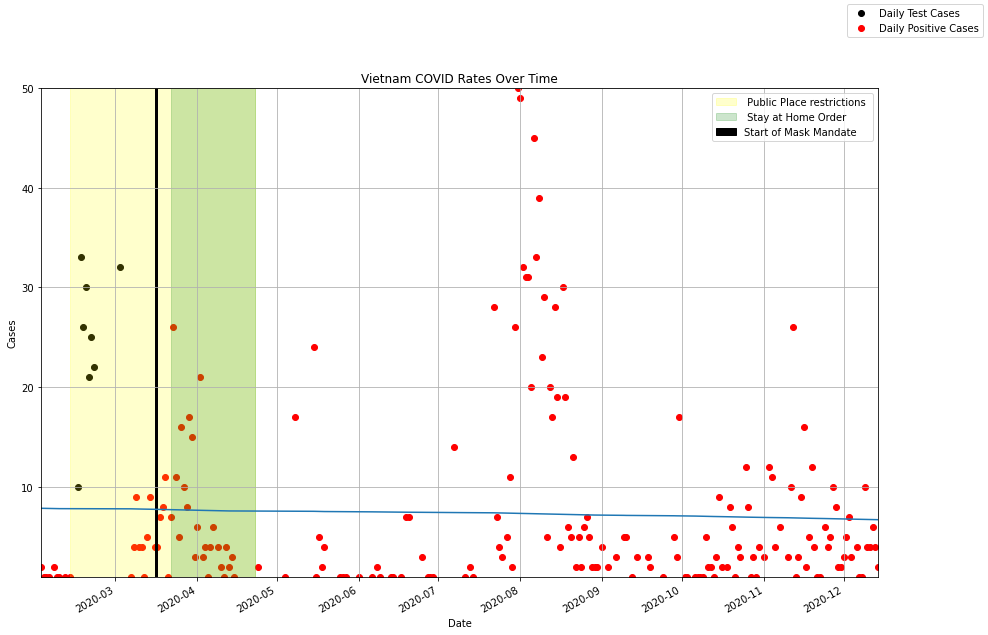

In [389]:
vtDF = asia_df.loc[asia_df['Country']=='Vietnam']
x_axisVT = pd.to_datetime(vtDF['date'])
y_axisVT = vtDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,2,13)), date2num(datetime(2020,4,23)),
           label=" Public Place restrictions ",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,22)), date2num(datetime(2020,4,23)),
           label=" Stay at Home Order ",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,16)), date2num(datetime(2020,3,17)),
           label="Start of Mask Mandate",color="black", alpha=1)

l2 = plt.scatter(x_axisVT, y_axisVT, marker="o", color="red")
title = plt.title('Vietnam COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

#secondary plot for testing
tDF = test.loc[test['Country'] == 'Vietnam']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')


fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisVT),max(y_axisVT))




#trend
x = np.arange(x_axisVT.size)
fit = np.polyfit(x, y_axisVT, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisVT, fit_function(x))

# Define the date format
monthsVT = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsMY)

ax.set_xlim(min(x_axisVT),max(x_axisVT))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

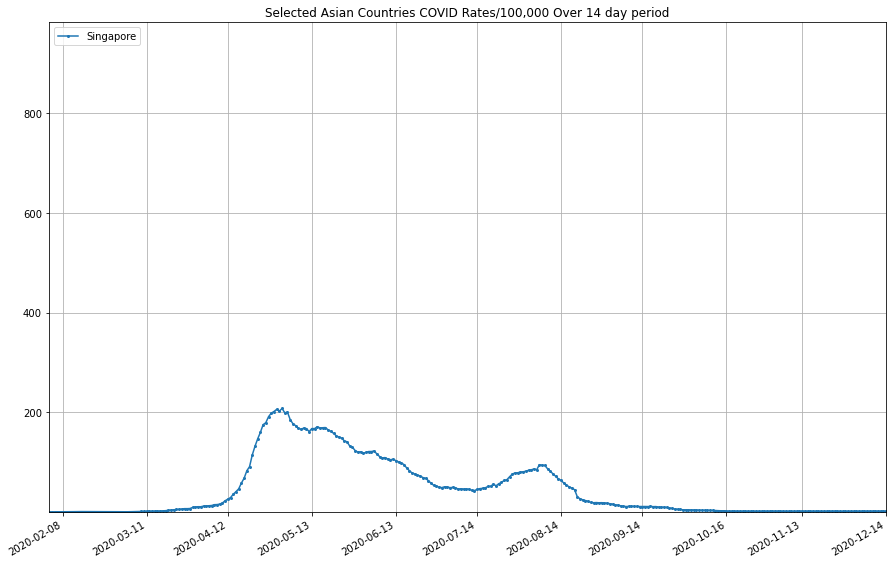

In [454]:
x_axis = asia_df['date']
y_axis = asia_df['14 day cases/100,000']
fig, ax = plt.subplots(figsize=(15, 10))
for name in asia_df['Country'].unique():
    plt.plot(asia_df[asia_df['Country'] == name]['date'], asia_df[asia_df['Country'] == name]['14 day cases/100,000'], marker="o",markersize=2, linestyle="solid", label=name)
months = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(months)
ax.set_xlim(min(x_axis),max(x_axis))
ax.set_ylim(min(y_axis), max(y_axis))
fig.autofmt_xdate()



#Plotting grid and displaying
plt.title('Selected Asian Countries COVID Rates/100,000 Over 14 day period')
plt.grid(True)
ax.legend(loc = 'upper left')
fig.savefig(f'output/Asia14day.jpg')

Slope : -467.53462275007956
Intercept : 124194.25211461543


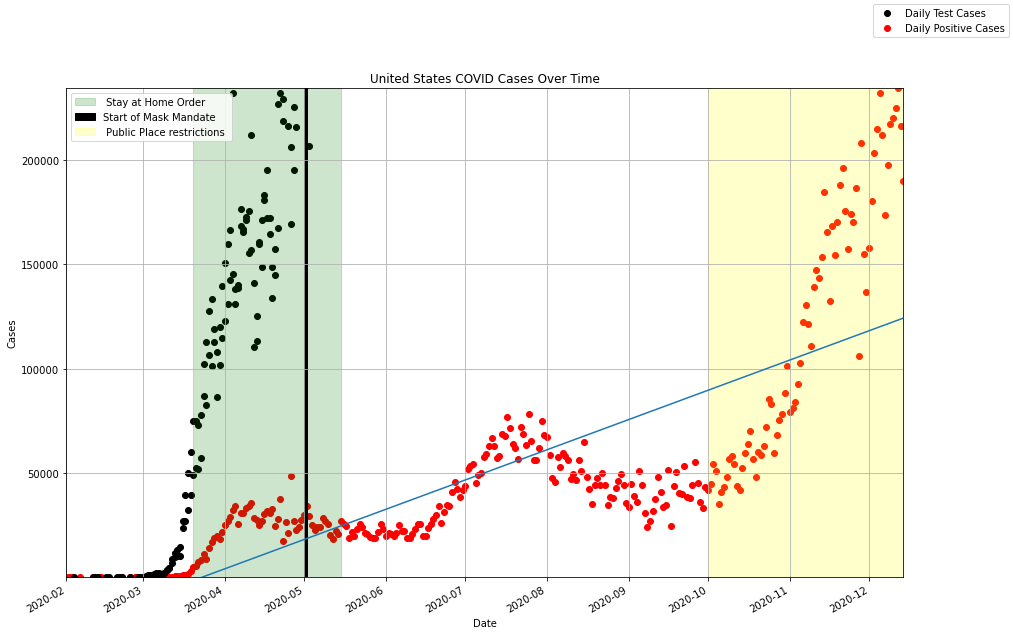

In [391]:
amDF = america_df.loc[america_df['Country']=='United_States_of_America']
x_axisAM = pd.to_datetime(amDF['date'])
y_axisAM = amDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15,10))
ax.axvspan(date2num(datetime(2020,3,20)), date2num(datetime(2020,5,15)),
          label=" Stay at Home Order ",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,5,1)), date2num(datetime(2020,5,2)),
          label="Start of Mask Mandate",color="black", alpha=1)
ax.axvspan(date2num(datetime(2020,10,1)), date2num(datetime(2020,12,31)),
          label=" Public Place restrictions ",color="yellow", alpha=0.2)
plt.scatter(x_axisAM, y_axisAM, marker="o", color="red")
title = plt.title('United States COVID Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')


#secondary plot for testing
tDF = test.loc[test['Country'] == 'united-states']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')
fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisAM),max(y_axisAM))




#trend
x = np.arange(x_axisAM.size)
fit = np.polyfit(x, y_axisAM, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisAM, fit_function(x))

# Define the date format
monthsAM = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsAM)

ax.set_xlim(min(x_axisAM),max(x_axisAM))
plt.legend(loc= 'upper left')
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : -25.28478249224492
Intercept : 7961.970437320529


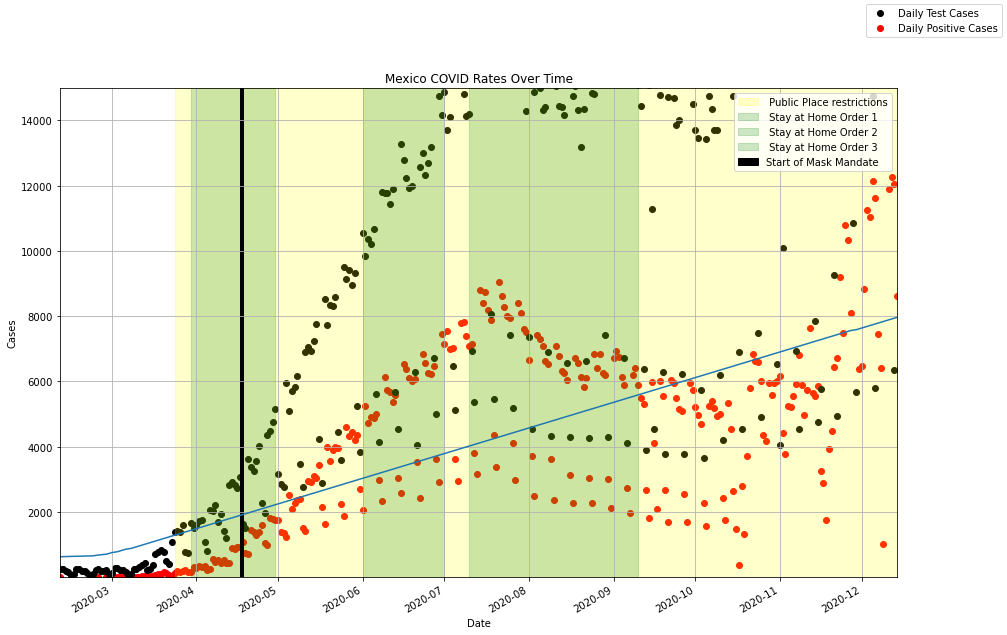

In [393]:
meDF = america_df.loc[america_df['Country']=='Mexico']
x_axisME = pd.to_datetime(meDF['date'])
y_axisME = meDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,3,24)), date2num(datetime(2020,12,31)),
           label=" Public Place restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,30)), date2num(datetime(2020,4,30)),
           label=" Stay at Home Order 1",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,6,1)), date2num(datetime(2020,7,1)),
           label=" Stay at Home Order 2",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,7,10)), date2num(datetime(2020,9,10)),
           label=" Stay at Home Order 3",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,4,17)), date2num(datetime(2020,4,18)),
           label="Start of Mask Mandate",color="black", alpha=1)

plt.scatter(x_axisME, y_axisME, marker="o", color="red")
title = plt.title('Mexico COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

#secondary plot for testing
tDF = test.loc[test['Country'] == 'Mexico']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisME),max(y_axisME))



#trend
x = np.arange(x_axisME.size)
fit = np.polyfit(x, y_axisME, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisME, fit_function(x))


# Define the date format
monthsME = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsME)

ax.set_xlim(min(x_axisME),max(x_axisME))
ax.set_ylim(min(y_axisME),15000)
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : -1.8134380749011958
Intercept : 816.8407544075442


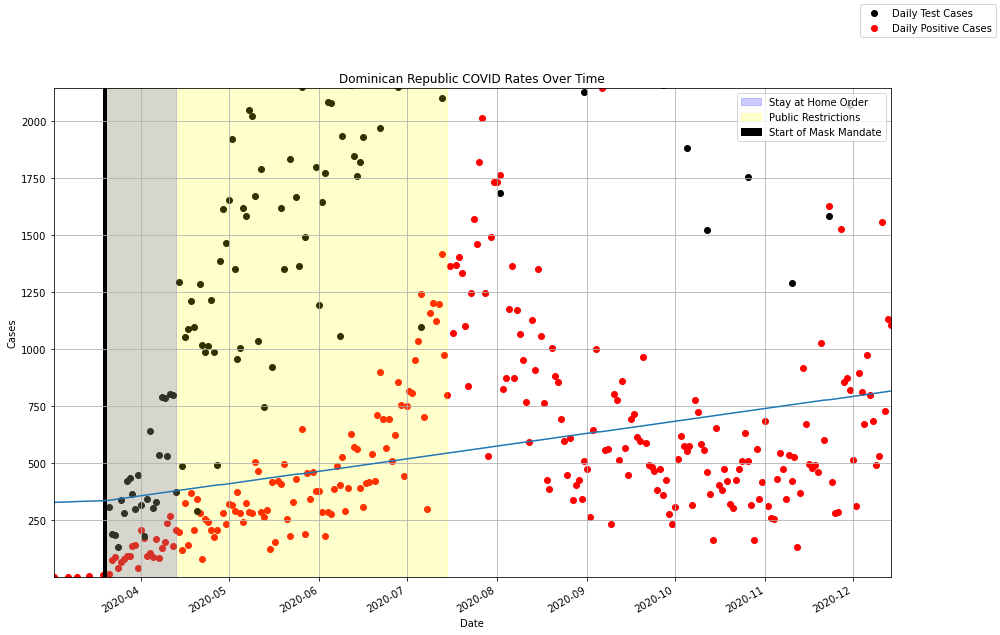

In [418]:
drDF = america_df.loc[america_df['Country']=='Dominican_Republic']
x_axisDR = pd.to_datetime(drDF['date'])
y_axisDR = drDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,3,19)), date2num(datetime(2020,4,13)),
           label="Stay at Home Order",color="blue", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,19)), date2num(datetime(2020,7,15)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,3,19)), date2num(datetime(2020,3,20)),
           label="Start of Mask Mandate",color="black", alpha=1)
plt.scatter(x_axisDR, y_axisDR, marker="o", color="red")
title = plt.title('Dominican Republic COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

#secondary plot for testing
tDF = test.loc[test['Country'] == 'dominican-republic']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisDR),max(y_axisDR))



#trend
x = np.arange(x_axisDR.size)
fit = np.polyfit(x, y_axisDR, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisDR, fit_function(x))

# Define the date format
monthsDR = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsDR)

ax.set_xlim(min(x_axisDR),max(x_axisDR))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : 1.7598884998222926
Intercept : 1863.6049612152565


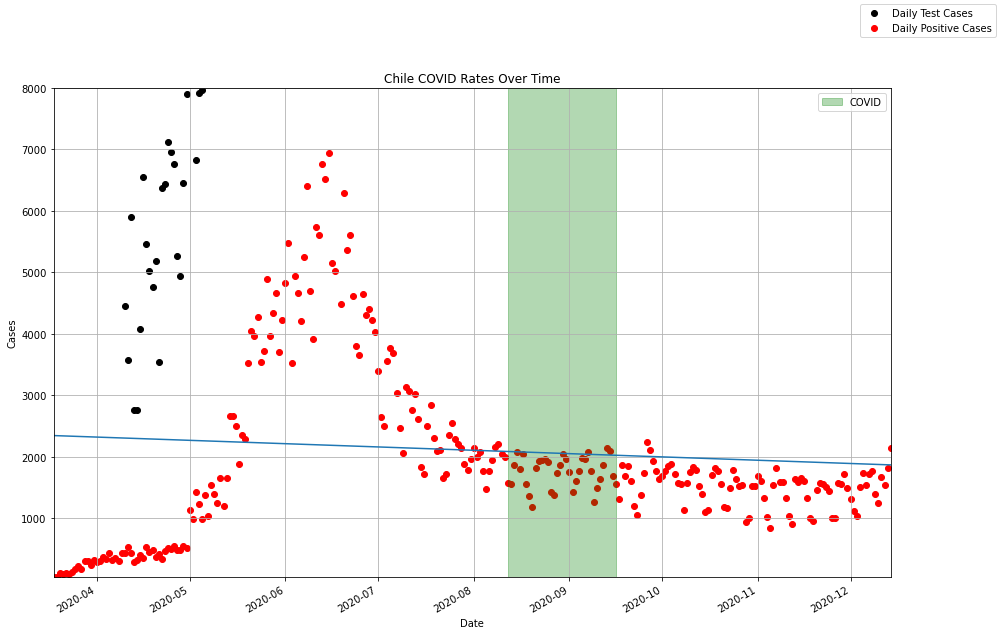

In [397]:
clDF = america_df.loc[america_df['Country']=='Chile']
x_axisCL = pd.to_datetime(clDF['date'])
y_axisCL = clDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,8,12)), date2num(datetime(2020,9,16)), 
           label="COVID",color="green", alpha=0.3)
plt.scatter(x_axisCL, y_axisCL, marker="o", color="red")
title = plt.title('Chile COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

#trend
x = np.arange(x_axisCL.size)
fit = np.polyfit(x, y_axisCL, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisCL, fit_function(x))

#secondary plot for testing
tDF = test.loc[test['Country'] == 'Chile']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisCL),max(y_axisCL))




# Define the date format
monthsCL = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsCL)

ax.set_xlim(min(x_axisCL),max(x_axisCL))
ax.set_ylim(min(y_axisCL), 8000)
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : -14.29340013670766
Intercept : 3661.1259771705295


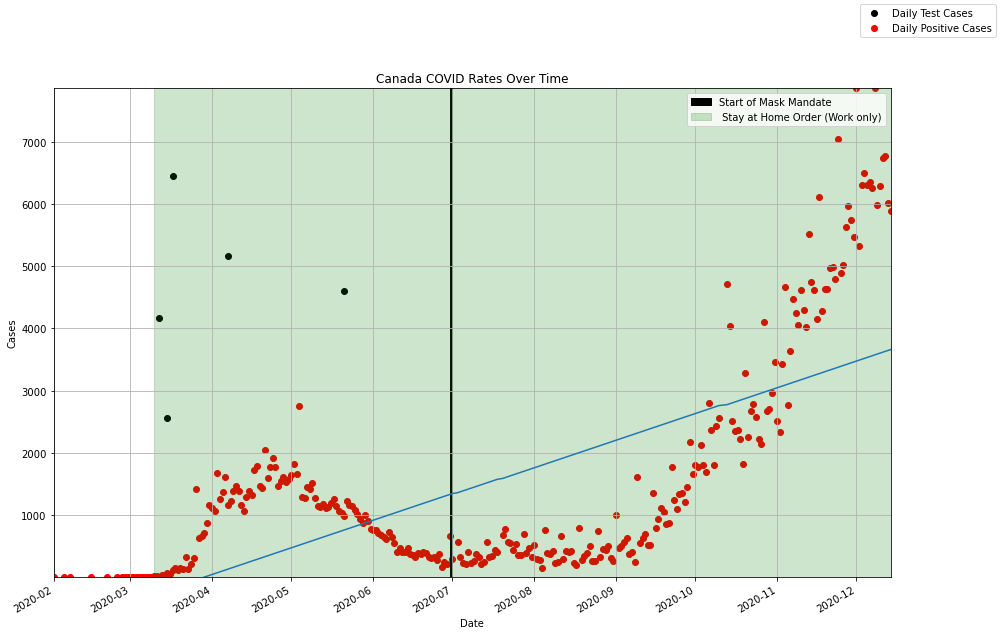

In [398]:
caDF = america_df.loc[america_df['Country']=='Canada']
x_axisCA = pd.to_datetime(caDF['date'])
y_axisCA = caDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,6,30)), date2num(datetime(2020,7,1)),
           label="Start of Mask Mandate",color="black", alpha=1)
ax.axvspan(date2num(datetime(2020,3,10)), date2num(datetime(2020,12,31)),
           label=" Stay at Home Order (Work only)",color="green", alpha=0.2)

plt.scatter(x_axisCA, y_axisCA, marker="o", color="red")
title = plt.title('Canada COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

#trend
x = np.arange(x_axisCA.size)
fit = np.polyfit(x, y_axisCA, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisCA, fit_function(x))

#secondary plot for testing
tDF = test.loc[test['Country'] == 'Canada']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisCA),max(y_axisCA))




# Define the date format
monthsCA = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsCA)

ax.set_xlim(min(x_axisCA),max(x_axisCA))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : -118.09734846324906
Intercept : 40987.19892037785


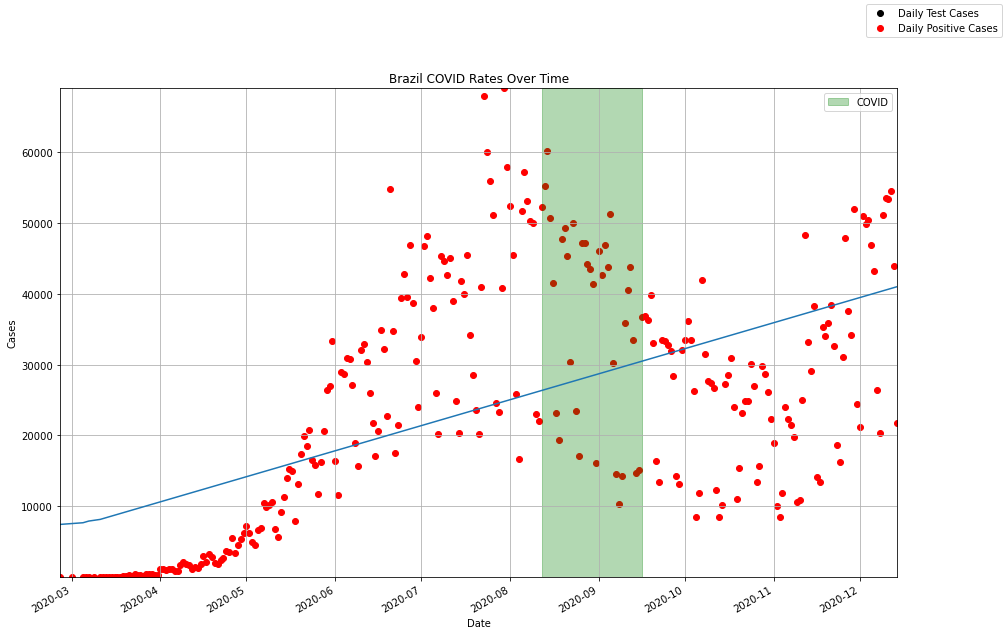

In [400]:
brDF = america_df.loc[america_df['Country']=='Brazil']
x_axisBR = pd.to_datetime(brDF['date'])
y_axisBR = brDF['cases']

#Defining the parameters to calculate the R-Value
fig, ax = plt.subplots(figsize=(15, 10))
ax.axvspan(date2num(datetime(2020,8,12)), date2num(datetime(2020,9,16)), 
           label="COVID",color="green", alpha=0.3)
plt.scatter(x_axisBR, y_axisBR, marker="o", color="red")
title = plt.title('Brazil COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')


#secondary plot for testing
tDF = test.loc[test['Country'] == 'Brazil']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisBR),max(y_axisBR))



#trend line
# Convert strings to datetime objects,and then to Matplotlib date numbers
x = np.arange(x_axisBR.size)
fit = np.polyfit(x, y_axisBR, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisBR, fit_function(x))

# Define the date format
monthsBR = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsBR)

ax.set_xlim(min(x_axisBR),max(x_axisBR))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

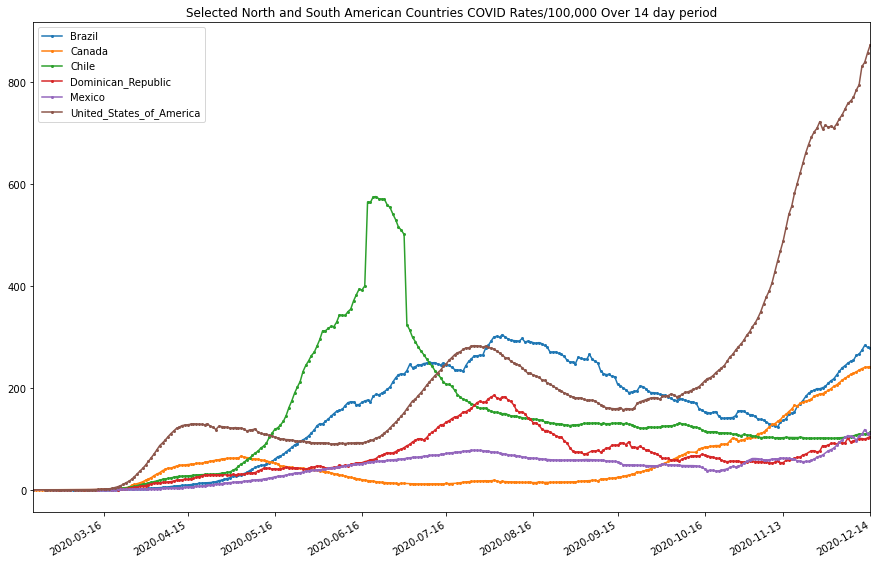

In [208]:
x_axis = america_df['date']
y_axis = america_df['14 day cases/100,000']
fig, ax = plt.subplots(figsize=(15, 10))
for name in america_df['Country'].unique():
    plt.plot(america_df[america_df['Country'] == name]['date'], america_df[america_df['Country'] == name]['14 day cases/100,000'], marker="o",markersize=2, linestyle="solid", label=name)
months = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(months)
ax.set_xlim(min(x_axis),max(x_axis))
fig.autofmt_xdate()



#Plotting grid and displaying
plt.title('Selected North and South American Countries COVID Rates/100,000 Over 14 day period')
ax.legend(loc = 'upper left')
fig.savefig(f'output/America14day.jpg')

In [35]:
oceania_df['Country'].unique()

array(['Australia', 'New_Zealand'], dtype=object)

Slope : 0.14944894615160165
Intercept : 71.45785953177257


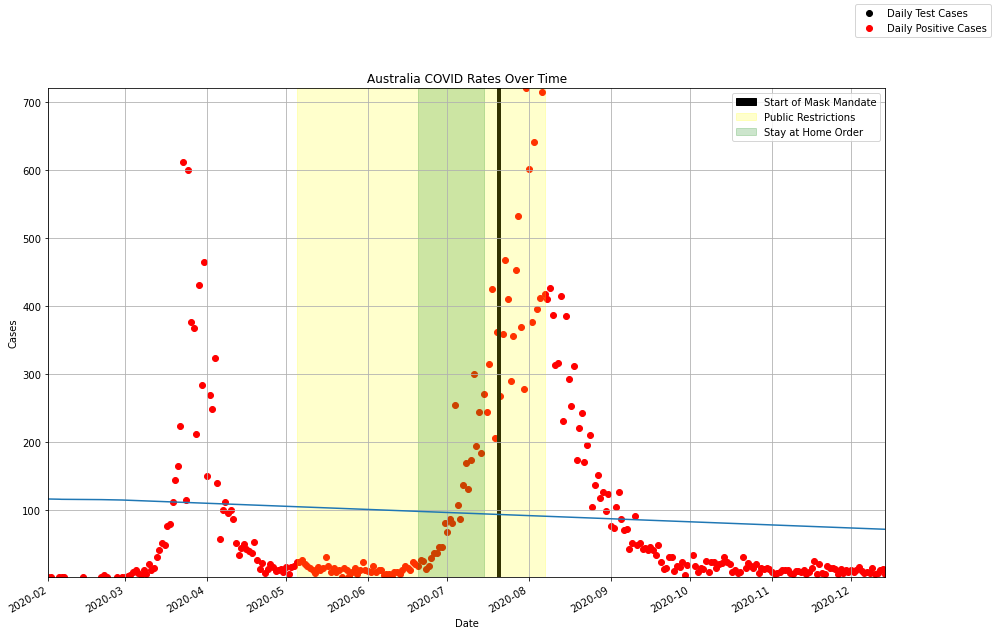

In [413]:
auDF = oceania_df.loc[oceania_df['Country']=='Australia']
x_axisAU = pd.to_datetime(auDF['date'])
y_axisAU = auDF['cases']

#Defining the parameters for highlights
fig, ax = plt.subplots(figsize=(15,10))
ax.axvspan(date2num(datetime(2020,7,20)), date2num(datetime(2020,7,21)),
           label="Start of Mask Mandate",color="black", alpha=1)
ax.axvspan(date2num(datetime(2020,5,5)), date2num(datetime(2020,8,7)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,6,20)), date2num(datetime(2020,7,15)),
           label="Stay at Home Order",color="green", alpha=0.2)
plt.scatter(x_axisAU, y_axisAU, marker="o", color="red")
title = plt.title('Australia COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

#secondary plot for testing
tDF = test.loc[test['Country'] == 'Australia']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisAU),max(y_axisAU))


#trend
x = np.arange(x_axisAU.size)
fit = np.polyfit(x, y_axisAU, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisAU, fit_function(x))


# Define the date format
monthsAU = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsAU)

ax.set_xlim(min(x_axisAU),max(x_axisAU))
plt.legend()
fig.autofmt_xdate()
plt.grid(True)
plt.show()
fig.savefig(f'output/{title}.jpg')

Slope : 0.09914033335085966
Intercept : -1.9852358168147615


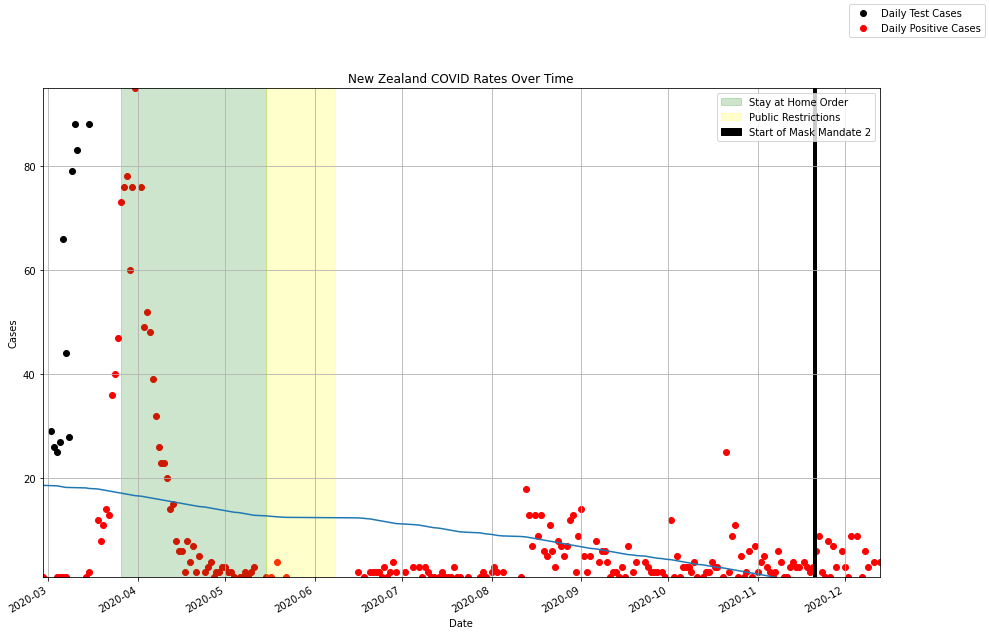

In [416]:
nzDF = oceania_df.loc[oceania_df['Country']=='New_Zealand']
x_axisNZ = pd.to_datetime(nzDF['date'])
y_axisNZ = nzDF['cases']

#Defining the parameters
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(x_axisNZ, y_axisNZ, marker="o", color="red")

#trend
x = np.arange(x_axisNZ.size)
fit = np.polyfit(x, y_axisNZ, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.plot(x_axisNZ, fit_function(x))

#secondary plot for testing
tDF = test.loc[test['Country'] == 'new-zealand']
x_axe = pd.to_datetime(tDF['date'])
y_axe = tDF['Daily Tests']
l1 = ax.scatter(x_axe,y_axe, color = 'black')

fig.legend((l1,l2),('Daily Test Cases','Daily Positive Cases'))
ax.set_ylim(min(y_axisNZ),max(y_axisNZ))


#Labeling x axis, y axis, and the title 
ax.axvspan(date2num(datetime(2020,3,26)), date2num(datetime(2020,5,15)),
           label="Stay at Home Order",color="green", alpha=0.2)
ax.axvspan(date2num(datetime(2020,5,15)), date2num(datetime(2020,6,8)),
           label="Public Restrictions",color="yellow", alpha=0.2)
ax.axvspan(date2num(datetime(2020,11,20)), date2num(datetime(2020,11,21)),
           label="Start of Mask Mandate 2",color="black", alpha=1)
plt.title('New Zealand COVID Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')

# Define the date format
monthsNZ = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(monthsNZ)

ax.set_xlim(min(x_axisNZ),max(x_axisNZ))
plt.legend(loc='upper right')
fig.autofmt_xdate()
plt.grid(True)
fig.savefig(f'output/NewZealandCases.jpg')
plt.show()


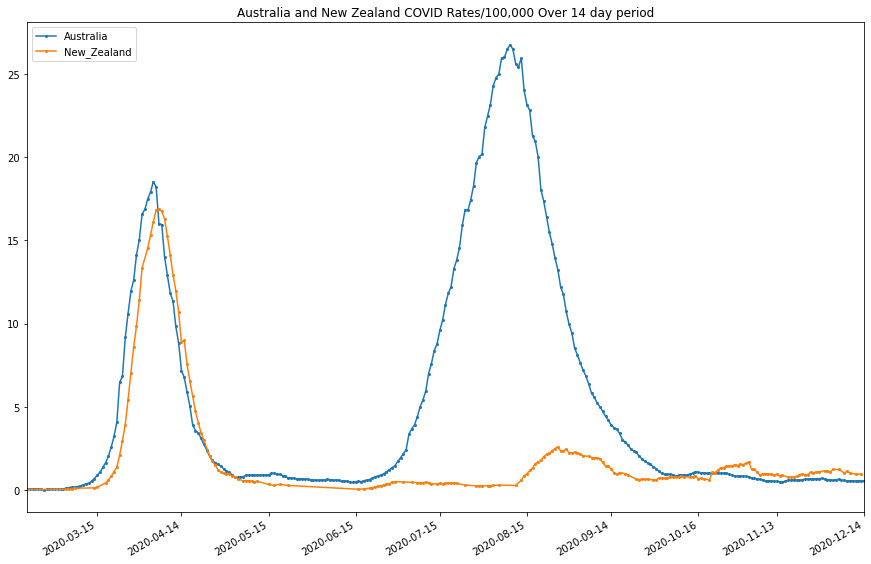

In [210]:
x_axis = oceania_df['date']
y_axis = oceania_df['14 day cases/100,000']
fig, ax = plt.subplots(figsize=(15, 10))
for name in oceania_df['Country'].unique():
    plt.plot(oceania_df[oceania_df['Country'] == name]['date'], oceania_df[oceania_df['Country'] == name]['14 day cases/100,000'], marker="o",markersize=2, linestyle="solid", label=name)
months = mdates.MonthLocator()  # every month
ax.xaxis.set_major_locator(months)
ax.set_xlim(min(x_axis),max(x_axis))
fig.autofmt_xdate()

#Plotting grid and displaying
plt.title('Australia and New Zealand COVID Rates/100,000 Over 14 day period')
plt.grid(True)
ax.legend(loc = 'upper left')
fig.savefig(f'output/Oceania14day.jpg')

